In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df_intern= pd.read_csv('data/internData.csv')
df_process = pd.read_csv('data/Copy_Order_Process.csv')
df_orders = pd.read_csv('data/Orders.csv')
df_shipping = pd.read_csv("data/Campaign_data.csv")

In [136]:
df_intern.columns

Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')

In [137]:
df_process.columns

Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date',
       'Ship Mode Warehouse'],
      dtype='object')

In [138]:
cols = df_intern.columns.tolist()
cols = [col.replace('Pickup Date', 'On Truck Scan Date') for col in cols]
df_intern.columns = cols


In [139]:
df_warehouse = df_intern.merge(df_process, on=['Order ID', 'On Truck Scan Date'], how='outer')

In [140]:
df_warehouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3001
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order ID             3002 non-null   object
 1   Ready to Ship Date   204 non-null    object
 2   On Truck Scan Date   3002 non-null   object
 3   Row ID               3002 non-null   int64 
 4   Order Date           3002 non-null   object
 5   Ship Mode Warehouse  3002 non-null   object
dtypes: int64(1), object(5)
memory usage: 164.2+ KB


In [142]:
df_warehouse.dropna(inplace=True) 
df_warehouse.head(15)

,Order ID,Ready to Ship Date,On Truck Scan Date,Row ID,Order Date,Ship Mode Warehouse
0,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,Express
1,CA-2019-129847,04/09/2019,04/09/2019,6937,2/9/2019,Express
2,CA-2019-129630,04/09/2019,04/09/2019,9929,4/9/2019,Express
3,CA-2019-106278,05/09/2019,06/09/2019,9069,2/9/2019,Standard Processing
4,CA-2019-158099,05/09/2019,06/09/2019,870,3/9/2019,Express
5,CA-2019-132143,05/09/2019,06/09/2019,2283,3/9/2019,Express
6,CA-2019-126732,06/09/2019,09/09/2019,9233,2/9/2019,Standard Processing
7,CA-2019-106950,06/09/2019,09/09/2019,7078,2/9/2019,Standard Processing
8,CA-2019-130407,06/09/2019,09/09/2019,1408,2/9/2019,Standard Processing
9,US-2019-101616,06/09/2019,06/09/2019,5354,3/9/2019,Express


In [143]:
cols1 = df_warehouse.columns.tolist()
cols1 = [col.replace(' ', '_') for col in cols1]
df_warehouse.columns = cols1
df_warehouse.columns

Index(['Order_ID', 'Ready_to_Ship_Date', 'On_Truck_Scan_Date', 'Row_ID',
       'Order_Date', 'Ship_Mode_Warehouse'],
      dtype='object')

In [144]:
#make columns in lower case
df_warehouse.columns = df_warehouse.columns.str.lower()  # make column names lowercase
df_warehouse.head(2)

,order_id,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse
0,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,Express
1,CA-2019-129847,04/09/2019,04/09/2019,6937,2/9/2019,Express


In [145]:
df_warehouse['ready_to_ship_date'] = pd.to_datetime(df_warehouse['ready_to_ship_date'], format='%d/%m/%Y')
df_warehouse['on_truck_scan_date'] = pd.to_datetime(df_warehouse['on_truck_scan_date'], format='%d/%m/%Y')
df_warehouse['order_date'] = pd.to_datetime(df_warehouse['order_date'], format='%d/%m/%Y')

In [146]:
df_warehouse['process_time']=(df_warehouse["ready_to_ship_date"]-df_warehouse["order_date"]).dt.days

In [147]:
df_warehouse.tail()

,order_id,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,process_time
199,US-2020-165456,2020-12-03,2020-12-04,9289,2020-11-30,Express,3
200,US-2020-110576,2020-12-04,2020-12-07,948,2020-11-28,Standard Processing,6
201,CA-2020-105333,2020-12-04,2020-12-07,5585,2020-11-30,Standard Processing,4
202,CA-2020-119305,2020-12-04,2020-12-07,956,2020-11-30,Standard Processing,4
203,CA-2020-142090,2020-12-07,2020-12-09,5066,2020-11-30,Standard Processing,7


In [148]:
df_warehouse.columns

Index(['order_id', 'ready_to_ship_date', 'on_truck_scan_date', 'row_id',
       'order_date', 'ship_mode_warehouse', 'process_time'],
      dtype='object')

In [149]:
df_warehouse["process_time"].mean()


4.176470588235294

In [19]:
df_warehouse["process_time"].min()

0

In [20]:
df_warehouse["process_time"].mode()

0    5
Name: process_time, dtype: int64

In [21]:
df_warehouse["process_time"].median()

4.0

In [22]:
df_warehouse["process_time"].max()

8

In [23]:
df_warehouse.sort_values('process_time').tail()

,order_id,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,process_time
145,CA-2020-137022,2020-11-23,2020-11-25,2874,2020-11-16,Standard Processing,7
159,US-2020-114657,2020-11-23,2020-11-25,5269,2020-11-16,Standard Processing,7
59,CA-2019-108875,2019-10-01,2019-10-02,5662,2019-09-24,Standard Processing,7
113,CA-2020-155621,2020-11-16,2020-11-18,8432,2020-11-08,Standard Processing,8
156,CA-2020-108112,2020-11-23,2020-11-25,4075,2020-11-15,Standard Processing,8


In [ ]:
df_warehouse[['process_time']].groupby('process_time').mean().plot(kind='pie',subplots=True, legend=None)

In [ ]:
df_warehouse.plot.pie(y="process_time")

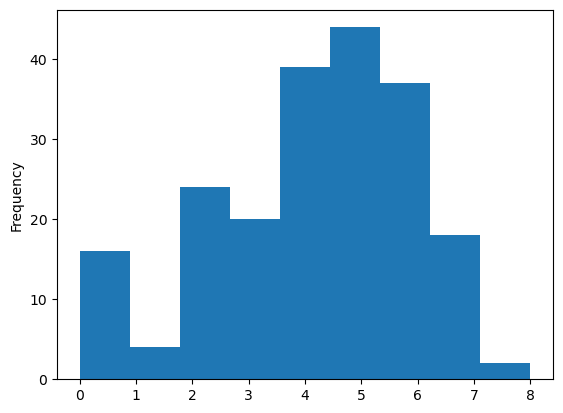

In [309]:
df_warehouse['process_time'].plot(kind='hist', bins=9);


In [300]:
df_warehouse[df_warehouse['process_time'] == 2
]

,order_id,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,process_time
1,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,Express,2
4,CA-2019-158099,2019-09-05,2019-09-06,870,2019-09-03,Express,2
5,CA-2019-132143,2019-09-05,2019-09-06,2283,2019-09-03,Express,2
24,CA-2019-110023,2019-09-11,2019-09-11,992,2019-09-09,Express,2
26,CA-2019-164350,2019-09-12,2019-09-13,2206,2019-09-10,Standard Processing,2
28,CA-2019-121223,2019-09-13,2019-09-16,613,2019-09-11,Standard Processing,2
29,CA-2019-143476,2019-09-13,2019-09-13,7208,2019-09-11,Express,2
53,CA-2019-155187,2019-09-26,2019-09-27,2331,2019-09-24,Standard Processing,2
54,CA-2019-132479,2019-09-26,2019-09-27,6263,2019-09-24,Express,2
65,US-2020-163790,2020-11-04,2020-11-06,4585,2020-11-02,Standard Processing,2


In [283]:
process_0 = df_process[df_process['process_time'] == (6)]
process_0.head()

,order_id_x,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,process_time,order_id_y,ship_mode_logistics,origin_channel,...,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,order_day
13,US-2019-147711,2019-09-09,2019-09-11,6779,2019-09-03,Standard Processing,6.0,US-2019-147711,Second Class,Email,...,21215.0,East,Toasted Muesli,With Fruit,FUR-BO-10003159,344.940,3,0.0,31.0446,1
19,US-2019-100566,2019-09-09,2019-09-11,1382,2019-09-03,Standard Processing,6.0,US-2019-100566,Standard Class,Facebook,...,60505.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10003394,83.952,3,0.6,-90.2484,1
25,CA-2019-123932,2019-09-12,2019-09-13,5352,2019-09-06,Standard Processing,6.0,CA-2019-123932,Standard Class,Sales,...,75217.0,Central,Power Muesli,Nuts and more,OFF-PA-10004665,41.920,4,0.2,15.1960,4
30,US-2019-118780,2019-09-16,2019-09-18,1619,2019-09-10,Standard Processing,6.0,US-2019-118780,Second Class,Facebook,...,10011.0,East,Power Muesli,Steel Cut,OFF-ST-10000352,59.480,2,0.0,8.9220,1
31,CA-2019-146206,2019-09-16,2019-09-18,2494,2019-09-10,Standard Processing,6.0,CA-2019-146206,Second Class,Email,...,77095.0,Central,Toasted Muesli,Sweetened,FUR-TA-10004086,300.930,5,0.3,-34.3920,1


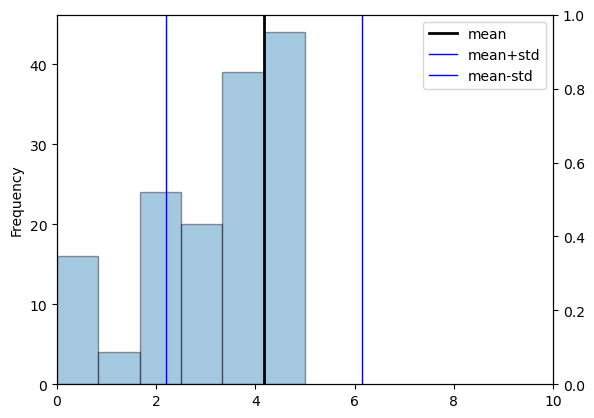

In [222]:
data =  df_warehouse.process_time

fig, ax = plt.subplots(dpi=100)
ax2 =ax.twinx()
ax.hist(data, bins=np.linspace(0, 5, 7), ec='k', alpha=0.4)
ax.axvline(data.mean(), lw=2, c='k', label='mean')
ax.axvline(data.mean()+data.std(), lw=1, c='b', label='mean+std')
ax.axvline(data.mean()-data.std(), lw=1, c='b', label='mean-std')
ax.set_xlim(0, 10)
ax.set_ylabel('Frequency')
#data.plot(kind='kde', ax=ax2, label='kde', ls='--', c='red')

ax.legend() 

print()

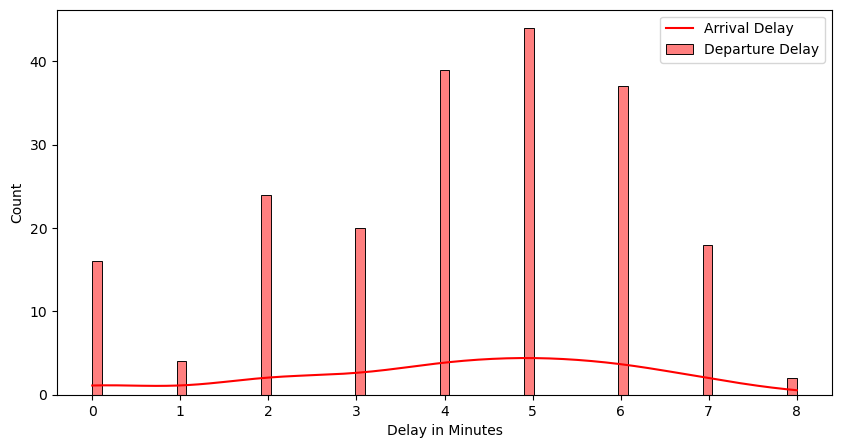

In [211]:
fig, ax = plt.subplots(figsize=(10,5))

xmax = 120
bins = 75
sns.histplot(ax = ax,
             data = df_warehouse.loc[df_warehouse['process_time'] < xmax],
             x = 'process_time',
             bins = bins,
             kde = True, 
             color = 'r')


ax.set_xlabel('Delay in Minutes')
ax.legend(['Arrival Delay', 'Departure Delay']);

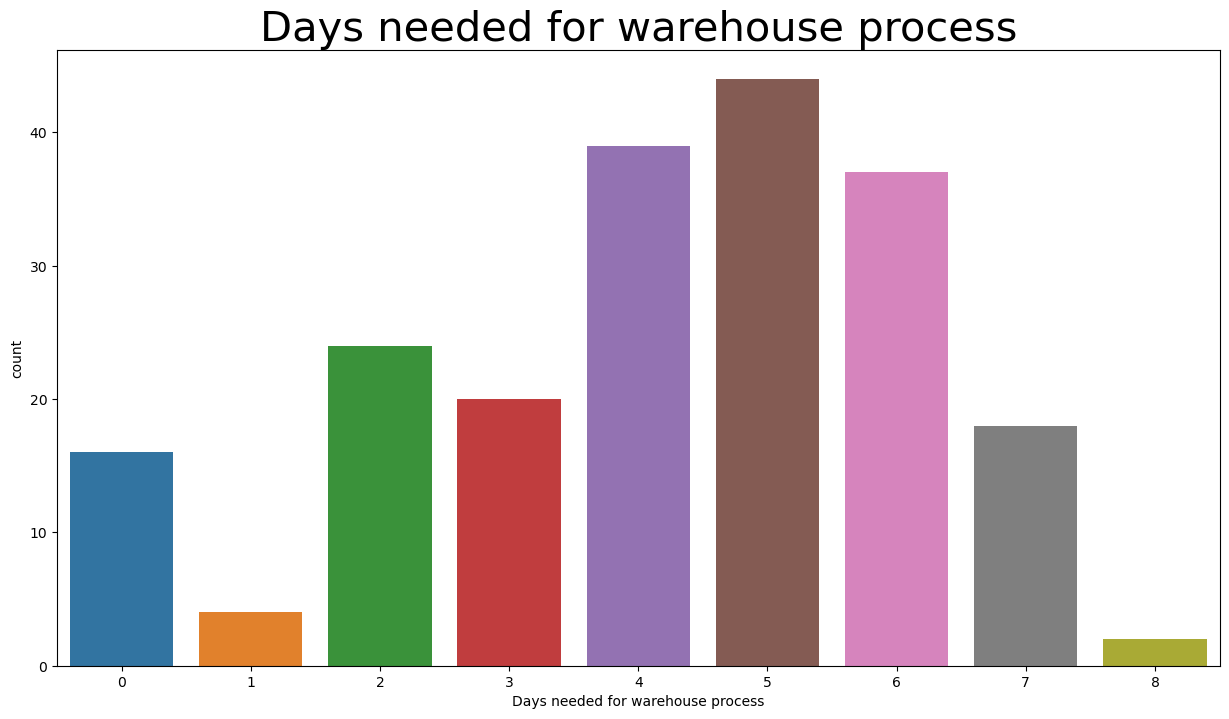

In [209]:
plt.figure(figsize=(15,8))# specify figure size
f1 = sns.countplot(x=df_warehouse['process_time']) # create countplot
sns.color_palette("husl",10) 
f1.tick_params(axis='x', rotation=360) # get x-ticks and rotate them
f1.set(xlabel="Days needed for warehouse process") # set label for x-axis 
#f1.set_ylabel("Waiting days", fontsize = 20); # set label for y-axis
f1.set_title('Days needed for warehouse process', fontsize=30); # set title


In [115]:
df_warehouse.std()["process_time"]


/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/2046098588.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_warehouse.std()["process_time"]


1.9697803868781165

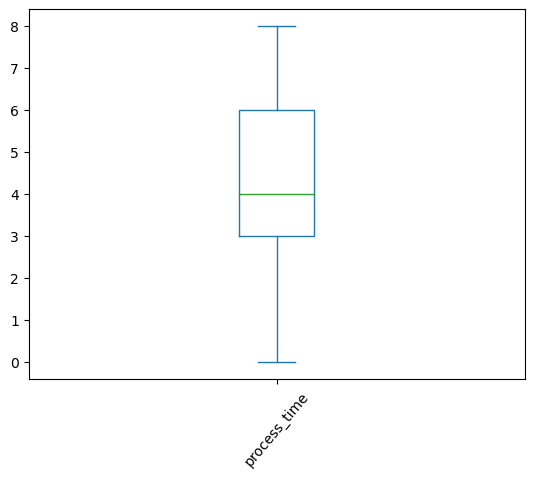

In [25]:
df_warehouse[['process_time']].plot(kind='box', rot= 50);


In [150]:
groupby_obj = df_warehouse.groupby('ship_mode_warehouse')
groupby_obj.mean()

/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/3471207693.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_obj.mean()


,row_id,process_time
ship_mode_warehouse,,
Express,5191.320755,2.037736
Standard Processing,5053.834437,4.927152


In [151]:
df_warehouse.head(15)

,order_id,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,process_time
0,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,Express,0
1,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,Express,2
2,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,Express,0
3,CA-2019-106278,2019-09-05,2019-09-06,9069,2019-09-02,Standard Processing,3
4,CA-2019-158099,2019-09-05,2019-09-06,870,2019-09-03,Express,2
5,CA-2019-132143,2019-09-05,2019-09-06,2283,2019-09-03,Express,2
6,CA-2019-126732,2019-09-06,2019-09-09,9233,2019-09-02,Standard Processing,4
7,CA-2019-106950,2019-09-06,2019-09-09,7078,2019-09-02,Standard Processing,4
8,CA-2019-130407,2019-09-06,2019-09-09,1408,2019-09-02,Standard Processing,4
9,US-2019-101616,2019-09-06,2019-09-06,5354,2019-09-03,Express,3


In [152]:
df_orders.head()

,Index,Order ID,Order Date,Ship Mode Logistics,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [63]:
cols2 = df_orders.columns.tolist()
cols2 = [col.replace(' ', '_') for col in cols2]
df_orders.columns = cols2

In [160]:
df_orders.columns

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode Logistics', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [161]:
#make columns in lower case
df_orders.columns = df_orders.columns.str.lower()
df_orders.head()

,index,order id,order date,ship mode logistics,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [162]:
cols3 = df_orders.columns.tolist()
cols3 = [col.replace('index', 'row_id') for col in cols3]
df_orders.columns = cols3

In [167]:
cols6 = df_orders.columns.tolist()
cols6 = [col.replace(' ', '_') for col in cols6]
df_orders.columns = cols6

In [168]:
df_warehouse.columns

Index(['order_id', 'ready_to_ship_date', 'on_truck_scan_date', 'row_id',
       'order_date', 'ship_mode_warehouse', 'process_time'],
      dtype='object')

In [173]:
df_orders.columns

Index(['row_id', 'order_id', 'ship_mode_logistics', 'customer_name',
       'origin_channel', 'city', 'state', 'postal_code', 'region', 'category',
       'sub-category', 'product_id', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [ ]:
#df_orders.drop("order_date", axis=1, inplace=True)
#df_orders.drop("customer_id", axis=1, inplace=True)
#df_orders.drop("country/region", axis=1, inplace=True)
#df_orders.drop("customer_name", axis=1, inplace=True)

In [182]:
df_orders.columns

Index(['row_id', 'order_id', 'ship_mode_logistics', 'origin_channel', 'city',
       'state', 'postal_code', 'region', 'category', 'sub-category',
       'product_id', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [ ]:
df_orders.drop("customer_name", axis=1, inplace=True)

In [184]:
df_process = df_warehouse.merge(df_orders, on=["row_id"], how= "outer")

In [185]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id_x           204 non-null    object        
 1   ready_to_ship_date   204 non-null    datetime64[ns]
 2   on_truck_scan_date   204 non-null    datetime64[ns]
 3   row_id               9994 non-null   int64         
 4   order_date           204 non-null    datetime64[ns]
 5   ship_mode_warehouse  204 non-null    object        
 6   process_time         204 non-null    float64       
 7   order_id_y           9994 non-null   object        
 8   ship_mode_logistics  9994 non-null   object        
 9   origin_channel       9994 non-null   object        
 10  city                 9994 non-null   object        
 11  state                9994 non-null   object        
 12  postal_code          9983 non-null   float64       
 13  region               9994 non-nul

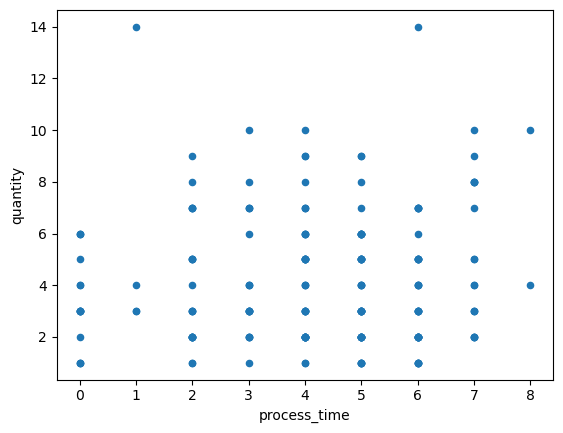

In [248]:
df_process.plot(kind='scatter', x='process_time', y='quantity');

In [186]:
df_process.dropna(inplace=True)
df_process.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id_x           204 non-null    object        
 1   ready_to_ship_date   204 non-null    datetime64[ns]
 2   on_truck_scan_date   204 non-null    datetime64[ns]
 3   row_id               204 non-null    int64         
 4   order_date           204 non-null    datetime64[ns]
 5   ship_mode_warehouse  204 non-null    object        
 6   process_time         204 non-null    float64       
 7   order_id_y           204 non-null    object        
 8   ship_mode_logistics  204 non-null    object        
 9   origin_channel       204 non-null    object        
 10  city                 204 non-null    object        
 11  state                204 non-null    object        
 12  postal_code          204 non-null    float64       
 13  region               204 non-null  

In [187]:
df_process.head()

,order_id_x,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,process_time,order_id_y,ship_mode_logistics,origin_channel,...,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,Express,0.0,CA-2019-116540,First Class,Email,...,Wisconsin,53711.0,Central,Power Muesli,Maple Sweetened,OFF-FA-10002676,1.810,1,0.0,0.6516
1,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,Express,2.0,CA-2019-129847,First Class,Facebook,...,Illinois,60653.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000277,84.272,2,0.6,-75.8448
2,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,Express,0.0,CA-2019-129630,First Class,Email,...,California,94122.0,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000260,24.270,3,0.0,8.7372
3,CA-2019-106278,2019-09-05,2019-09-06,9069,2019-09-02,Standard Processing,3.0,CA-2019-106278,Second Class,Email,...,Washington,98198.0,West,Toasted Muesli,With Nuts,FUR-CH-10003061,215.976,3,0.2,-2.6997
4,CA-2019-158099,2019-09-05,2019-09-06,870,2019-09-03,Express,2.0,CA-2019-158099,First Class,Facebook,...,Pennsylvania,19143.0,East,Power Muesli,Super Fibre Boost,OFF-BI-10000545,1141.470,5,0.7,-760.9800


In [252]:
groupby_obj3 = df_process.groupby('ship_mode_warehouse')
groupby_obj3.mean()

/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/1786015940.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_obj3.mean()


,row_id,process_time,postal_code,sales,quantity,discount,profit,order_day
ship_mode_warehouse,,,,,,,,
Express,5191.320755,2.037736,59105.452830,324.029396,4.415094,0.192453,-93.997591,1.981132
Standard Processing,5053.834437,4.927152,54338.238411,170.171574,4.072848,0.133709,24.531457,2.258278


In [188]:
df_process.groupby("category").mean()["process_time"]

/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/865119778.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_process.groupby("category").mean()["process_time"]


category
Power Muesli               4.115702
Special Projects Muesil    3.911765
Toasted Muesli             4.510204
Name: process_time, dtype: float64

In [189]:
df_process.groupby("sub-category").mean()["process_time"]

/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/3017418957.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_process.groupby("sub-category").mean()["process_time"]


sub-category
Gluten Free                4.352941
Hunger Buster              4.000000
Low Sugar                  2.333333
Maple Sweetened            2.000000
Mega Protein               4.375000
No Taste All Power         4.800000
Nuts and more              3.931034
Only Oats                  3.416667
Organic                    5.500000
Power Clean Fibre Boost    4.625000
Steel Cut                  4.684211
Super Fibre Boost          3.967742
Super Mega Protein         3.777778
Sweetened                  3.833333
With Fruit                 5.142857
With Fruit and Nuts        4.592593
With Nuts                  4.222222
Name: process_time, dtype: float64

In [190]:
df_process.columns

Index(['order_id_x', 'ready_to_ship_date', 'on_truck_scan_date', 'row_id',
       'order_date', 'ship_mode_warehouse', 'process_time', 'order_id_y',
       'ship_mode_logistics', 'origin_channel', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'product_id', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [195]:
groupby_obj2 = df_process.groupby("process_time")
groupby_obj2.count()

,order_id_x,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,order_id_y,ship_mode_logistics,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
process_time,,,,,,,,,,,,,,,,,,,,
0.0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2.0,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
3.0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
4.0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
5.0,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
6.0,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
7.0,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
8.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [264]:
groupby_obj3 = df_process.groupby(["category", "sub-category"]).mean()[["process_time", "quantity"]]
groupby_obj3


/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/390921538.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_obj3 = df_process.groupby(["category", "sub-category"]).mean()[["process_time", "quantity"]]


process_time  quantity
category                sub-category                                   
Power Muesli            Hunger Buster                4.000000  2.000000
                        Maple Sweetened              2.000000  2.000000
                        Mega Protein                 4.375000  5.000000
                        No Taste All Power           4.800000  3.200000
                        Nuts and more                3.931034  4.275862
                        Power Clean Fibre Boost      4.625000  3.625000
                        Steel Cut                    4.684211  3.631579
                        Super Fibre Boost            3.967742  4.903226
                        Super Mega Protein           3.777778  3.722222
Special Projects Muesil Gluten Free                  4.352941  5.058824
                        Low Sugar                    2.333333  3.666667
                        Only Oats                    3.416667  4.500000
                        Organic                      5.500000  5.000000
Toasted Muesli          Sweetened                    3.833333  4.333333
                        With Fruit                   5.142857  3.857143
                        With Fruit and Nuts          4.592593  3.851852
                        With Nuts                    4.222222  3.111111

In [198]:
df_process["order_day"]=df_warehouse["order_date"].dt.dayofweek
df_process.head()

,order_id_x,ready_to_ship_date,on_truck_scan_date,row_id,order_date,ship_mode_warehouse,process_time,order_id_y,ship_mode_logistics,origin_channel,...,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,order_day
0,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,Express,0.0,CA-2019-116540,First Class,Email,...,53711.0,Central,Power Muesli,Maple Sweetened,OFF-FA-10002676,1.810,1,0.0,0.6516,0
1,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,Express,2.0,CA-2019-129847,First Class,Facebook,...,60653.0,Central,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000277,84.272,2,0.6,-75.8448,0
2,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,Express,0.0,CA-2019-129630,First Class,Email,...,94122.0,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000260,24.270,3,0.0,8.7372,2
3,CA-2019-106278,2019-09-05,2019-09-06,9069,2019-09-02,Standard Processing,3.0,CA-2019-106278,Second Class,Email,...,98198.0,West,Toasted Muesli,With Nuts,FUR-CH-10003061,215.976,3,0.2,-2.6997,0
4,CA-2019-158099,2019-09-05,2019-09-06,870,2019-09-03,Express,2.0,CA-2019-158099,First Class,Facebook,...,19143.0,East,Power Muesli,Super Fibre Boost,OFF-BI-10000545,1141.470,5,0.7,-760.9800,1


In [271]:
groupby_obj4 = df_process.groupby('ship_mode_warehouse')
groupby_obj4.std()["process_time"]

/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/705036532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_obj4.std()["process_time"]


ship_mode_warehouse
Express                1.686625
Standard Processing    1.442680
Name: process_time, dtype: float64

In [ ]:
df_process['order_day'].plot(kind='area');


array([[<AxesSubplot: title={'center': 'order_day'}>]], dtype=object)

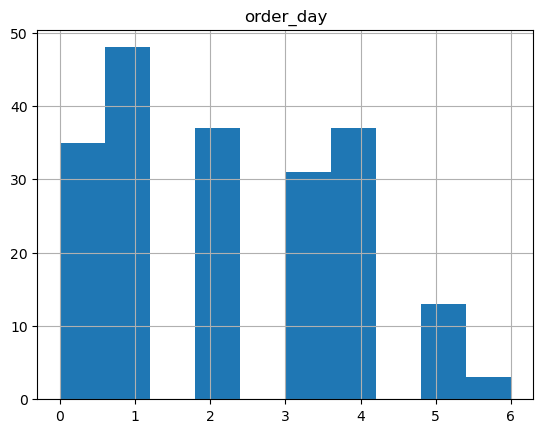

In [246]:
df_process.hist(column='order_day', grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, legend=False)


In [286]:
df_process.columns

Index(['order_id_x', 'ready_to_ship_date', 'on_truck_scan_date', 'row_id',
       'order_date', 'ship_mode_warehouse', 'process_time', 'order_id_y',
       'ship_mode_logistics', 'origin_channel', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'product_id', 'sales', 'quantity',
       'discount', 'profit', 'order_day'],
      dtype='object')

<AxesSubplot: xlabel='order_day'>

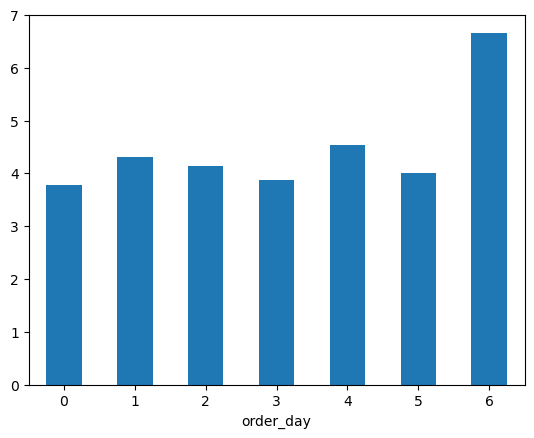

In [290]:
df_process[['order_day', 'process_time']].groupby('order_day').mean().plot(kind='bar', legend=None, rot = 360)

In [229]:
df_day_time.head(8)

order_day
0    3.771429
1    4.312500
2    4.135135
3    3.870968
4    4.540541
5    4.000000
6    6.666667
Name: process_time, dtype: float64

In [240]:
df_day_time2_list = [{"Monday": 3.77}, {"Tuesday": 4.32}, {"Wednesday": 4.14}, {"Thursday": 3.87}, {"Friday": 4.54}, {"Saturday": 4.00}, {"Sunday": 6.67}]
df_day_time2 = pd.DataFrame(df_day_time2_list)
df_day_time2

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3.77,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4.32,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.14,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.87,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,4.54,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,6.67


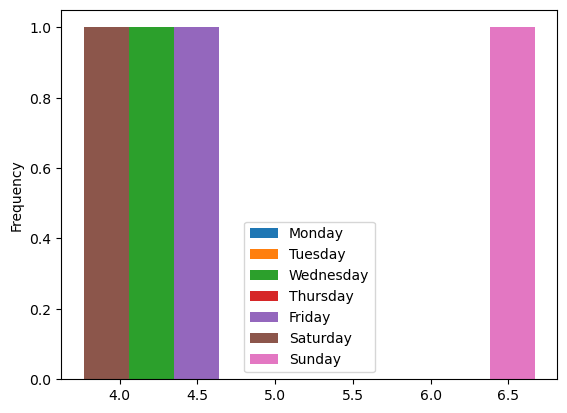

In [241]:
df_day_time2.plot(kind='hist');

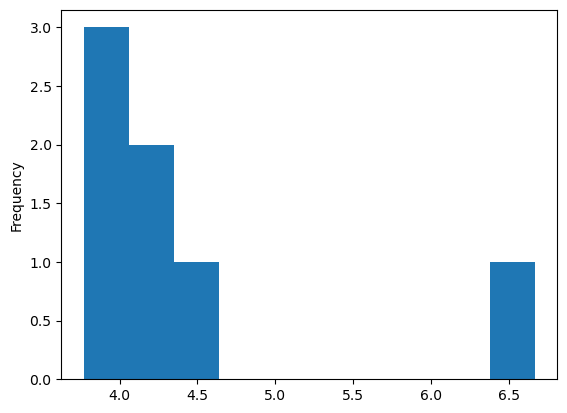

In [230]:
df_day_time.plot(kind='hist');

In [ ]:
df_process.order_day.plot(kind="hist", y= )

In [196]:
# correlation matrix between these variables
corr_columns=["process_time", "ship_mode_warehouse", "profit", "quantity"]
corr_mtrx=df_process[corr_columns].corr()
corr_mtrx

/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_4409/269483391.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtrx=df_process[corr_columns].corr()


,process_time,profit,quantity
process_time,1.000000,0.191636,0.077091
profit,0.191636,1.000000,0.025923
quantity,0.077091,0.025923,1.000000


In [106]:
df_shipping

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly
...,...,...,...
328,CA-2020-129707,08/05/2020,Larry Hughes
329,CA-2020-125381,08/05/2020,Speros Goranitis
330,CA-2020-141733,15/05/2020,Rick Wilson
331,US-2020-104451,15/05/2020,Michelle Moray


In [107]:
cols4 = df_shipping.columns.tolist()
cols4 = [col.replace(' ', '_') for col in cols4]
df_shipping.columns = cols4

In [108]:
df_shipping.columns = df_shipping.columns.str.lower()